## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
# sys.path.append("..")
import time

Let's import neural_de

In [2]:
from neural_de.transformations import TransformationPipeline

2025-03-07 11:18:00.025846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 11:18:00.174929: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 11:18:00.209229: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 11:18:00.754206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

We load an example image

Text(0.5, 1.0, '(427, 640, 3)')

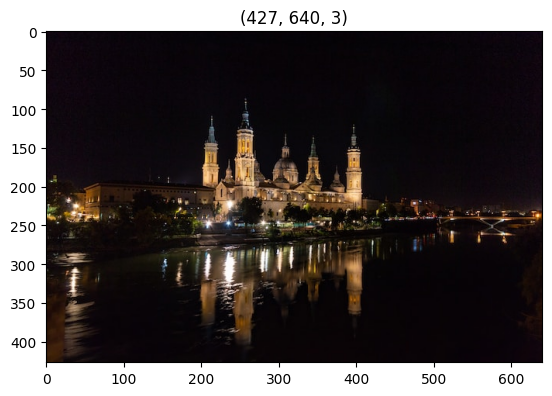

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]= "TRUE"
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

start=time.time()
input_path = Path('../examples/images/night.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(image.shape)

# Pipeline configuration file format example

NeuralDe offers two ways to configure your pipeline, from a yaml file or directly from a list of parameters dict
### 1) Pipeline from a yaml file of the following structure :

---

    name: ResolutionEnhancer
        init_param:
            device: 'cpu'
        transform:
          target_shape: [800, 800]
          crop_ratio: .3
    name: DesnowEnhancer

 ---
Please note that :

- transform is for transformation parameters
- init_param if for initialisation parameters
- init_param and transform can be removed (as in DesnowEnhancer) if you want to use the defaults values for each method

Let's see an example :

In [4]:
config_file = 'config/conf_user.yaml' # user configuration path

In [5]:
pipeline = TransformationPipeline(config_file)
res_image = pipeline.transform([image])

[03-07 11:18:02] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-07 11:18:02] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:58} INFO - Config loaded from config/conf_user.yaml loaded
[03-07 11:18:02] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:38} INFO - Config file loaded
[03-07 11:18:02] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:65} INFO - Loading all the pipeline methods and models
[03-07 11:18:02] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


2025-03-07 11:18:03.584954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[03-07 11:19:19] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_night_image_enhancer.py:57} INFO - Model https://tfhub.dev/sayakpaul/maxim_s-2_enhancement_fivek/1 loaded


INFO:neural_de_logger:Model https://tfhub.dev/sayakpaul/maxim_s-2_enhancement_fivek/1 loaded


[03-07 11:19:19] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:19:19] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_derain_enhancer.py:54} INFO - Checking model availability...


INFO:neural_de_logger:Checking model availability...


[03-07 11:19:19] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_model_manager.py:58} INFO - Model already available locally, skipping download


INFO:neural_de_logger:Model already available locally, skipping download


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_derain_enhancer.py:73} INFO - Trained model GT-rain loaded


INFO:neural_de_logger:Trained model GT-rain loaded


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:41} INFO - Checking model availability...


INFO:neural_de_logger:Checking model availability...


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_model_manager.py:58} INFO - Model already available locally, skipping download


INFO:neural_de_logger:Model already available locally, skipping download


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:56} INFO - Loading model. Using cuda 



INFO:neural_de_logger:Loading model. Using cuda 



[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:50} INFO - Model correctly loaded to cuda


INFO:neural_de_logger:Model correctly loaded to cuda


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_resolution_enhancer.py:64} INFO - ResolutionEnhancer Initialized 


INFO:neural_de_logger:ResolutionEnhancer Initialized 


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:84} INFO - All pipeline models successfully loaded


INFO:neural_de_logger:All pipeline models successfully loaded


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._night_image_enhancer.NightImageEnhancer object at 0x7f1b4d1d4580> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._night_image_enhancer.NightImageEnhancer object at 0x7f1b4d1d4580> to images


[03-07 11:19:21] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_night_image_enhancer.py:114} INFO - New image shape detected, readying model for size (448, 640)


INFO:neural_de_logger:New image shape detected, readying model for size (448, 640)


[03-07 11:19:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_night_image_enhancer.py:117} INFO - Model ready for image size (448, 640)


INFO:neural_de_logger:Model ready for image size (448, 640)


1/1 [==============================] - 53s 53s/step
[03-07 11:20:33] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._derain_enhancer.DeRainEnhancer object at 0x7f1ac4278280> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._derain_enhancer.DeRainEnhancer object at 0x7f1ac4278280> to images


[03-07 11:20:33] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._desnow_enhancer.DeSnowEnhancer object at 0x7f1ac42789d0> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._desnow_enhancer.DeSnowEnhancer object at 0x7f1ac42789d0> to images


[03-07 11:20:34] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._kernel_deblurring_enhancer.KernelDeblurringEnhancer object at 0x7f1ac41ff820> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._kernel_deblurring_enhancer.KernelDeblurringEnhancer object at 0x7f1ac41ff820> to images


[03-07 11:20:34] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._resolution_enhancer.ResolutionEnhancer object at 0x7f1ac4671be0> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._resolution_enhancer.ResolutionEnhancer object at 0x7f1ac4671be0> to images


[03-07 11:20:34] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
/opt/conda/envs/env-neural39/lib/python3.9/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[03-07 11:20:36] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_resolution_enhancer.py:73} INFO - Swin2 model loaded to cuda


INFO:neural_de_logger:Swin2 model loaded to cuda


Text(0.5, 1.0, '(1, 800, 800, 3)')

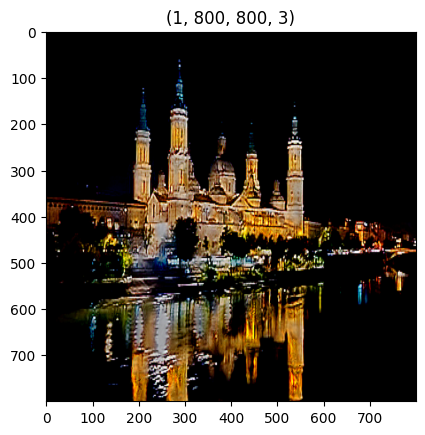

In [6]:
# show transformations final result
plt.imshow(res_image[0])
plt.title(res_image.shape)

## 2) Pipeline from a python list

For a dynamic usage of NeuralDe pipelines, to perform automatic parameter search for example, or if you do not want to store the configuration on a local filesystem,
you can directly provide the configuration as a list of each method name and parameters.

Let's see an example :

In [7]:
conf = [{"name": 'ResolutionEnhancer', "transform": {'target_shape': [100, 100], 'crop_ratio': 0.5}},
        {"name": 'KernelDeblurringEnhancer', "init_param": {"kernel":"medium"}}]

As in the yaml syntax, if we only use the default parameters for initialization or transform, we can omit the corresponding fields.

In [8]:
pipeline = TransformationPipeline(conf)
res_image = pipeline.transform([image])

[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:38} INFO - Config file loaded


INFO:neural_de_logger:Config file loaded


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:65} INFO - Loading all the pipeline methods and models


INFO:neural_de_logger:Loading all the pipeline methods and models


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_resolution_enhancer.py:64} INFO - ResolutionEnhancer Initialized 


INFO:neural_de_logger:ResolutionEnhancer Initialized 


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:84} INFO - All pipeline models successfully loaded


INFO:neural_de_logger:All pipeline models successfully loaded


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._resolution_enhancer.ResolutionEnhancer object at 0x7f1b4d475c40> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._resolution_enhancer.ResolutionEnhancer object at 0x7f1b4d475c40> to images


[03-07 11:20:39] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


INFO:neural_de_logger:Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


[03-07 11:20:40] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_resolution_enhancer.py:73} INFO - Swin2 model loaded to cpu


INFO:neural_de_logger:Swin2 model loaded to cpu


[03-07 11:20:42] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_transformation_pipeline.py:105} INFO - Applying method <neural_de.transformations._kernel_deblurring_enhancer.KernelDeblurringEnhancer object at 0x7f1b4d475340> to images


INFO:neural_de_logger:Applying method <neural_de.transformations._kernel_deblurring_enhancer.KernelDeblurringEnhancer object at 0x7f1b4d475340> to images


- Let's see the result :

Text(0.5, 1.0, '(100, 100, 3)')

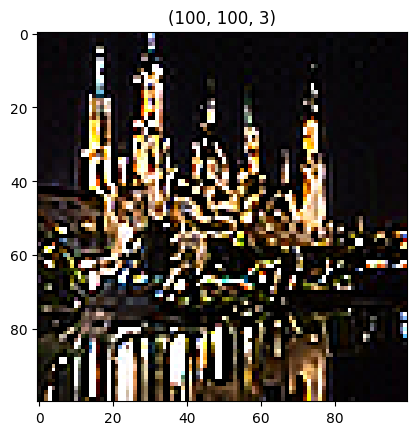

In [9]:
plt.imshow(res_image[0])
plt.title(res_image[0].shape)

- We made a pipeline for pixel art !

In [10]:
end=time.time()
print("temps final : ",end-start)

temps final :  160.55918836593628
